In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('Employee.csv')

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


No null values

In [5]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


# EDA

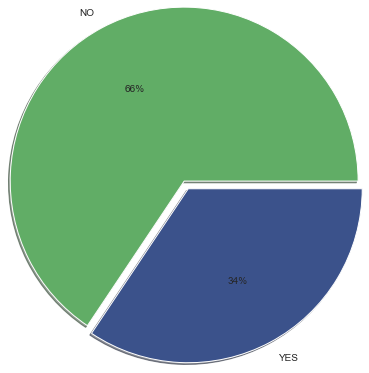

In [44]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
#to see the composition of LeaveOrNot
out_df=pd.DataFrame(df.groupby('LeaveOrNot')['LeaveOrNot'].count())
colors = ['#61ad66','#3b528b']
plt.pie(out_df['LeaveOrNot'],labels=['NO','YES'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

Imbalanced dataset

## Education

In [206]:
d1=pd.DataFrame(df.groupby(['Education','LeaveOrNot'])['Education'].count())
d1

Education
Education LeaveOrNot           
Bachelors 0                2472
          1                1129
Masters   0                 447
          1                 426
PHD       0                 134
          1                  45

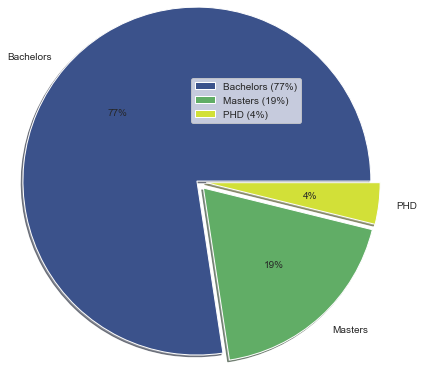

In [77]:
#to see the composition of education
out_df=pd.DataFrame(df.groupby('Education')['Education'].count())
colors = ['#3b528b','#61ad66','#d2e038']
plt.pie(out_df['Education'],labels=['Bachelors','Masters','PHD'],autopct='%.0f%%',colors=colors,radius=2,explode = (0.01,0.1, 0.1),shadow=True)
plt.legend(['Bachelors (77%)','Masters (19%)','PHD (4%)'], loc="best")
plt.show()

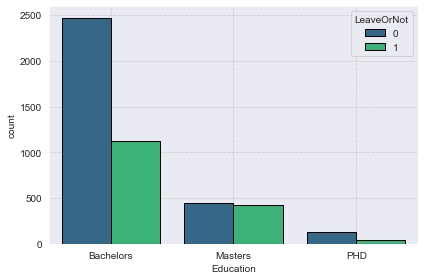

In [76]:
sns.countplot(df['Education'],hue=df['LeaveOrNot'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [207]:
prop_df=[]
for val in np.sort(df['Education'].unique()):
    prop=d1['Education'][val][1]/(d1['Education'][val][1]+d1['Education'][val][0])
    prop_df.append({
        'Education':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,Education,proportion
1,Masters,0.487973
0,Bachelors,0.313524
2,PHD,0.251397


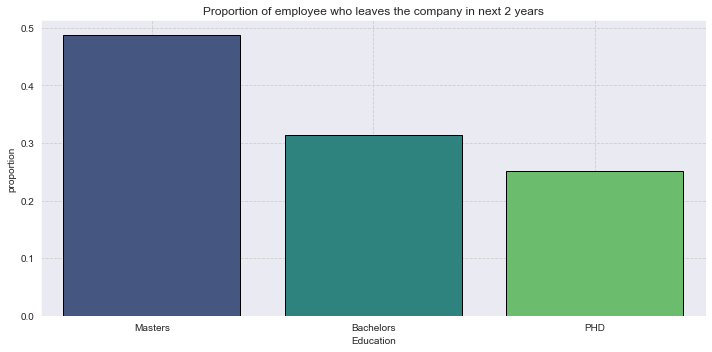

In [208]:
plt.figure(figsize=(10,5))
sns.barplot(x=prop_df['Education'],y=prop_df['proportion'],palette='viridis',edgecolor="black",order=prop_df['Education'])
plt.title("Proportion of employee who leaves the company in next 2 years")
plt.xlabel('Education')
plt.tight_layout()
plt.grid(True)
plt.show()

* Here we can see that employees with masters degree are more likely to leave the organisation. And employees with PHD degree are more likely to leave.

## JoiningYear

In [187]:
d1=pd.DataFrame(df.groupby(['JoiningYear','LeaveOrNot'])['JoiningYear'].count())
d1

JoiningYear
JoiningYear LeaveOrNot             
2012        0                   395
            1                   109
2013        0                   445
            1                   224
2014        0                   526
            1                   173
2015        0                   463
            1                   318
2016        0                   408
            1                   117
2017        0                   811
            1                   297
2018        0                     5
            1                   362

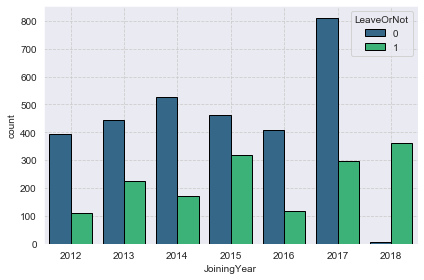

In [182]:
sns.countplot(df['JoiningYear'],hue=df['LeaveOrNot'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [203]:
prop_df=[]
for val in np.sort(df['JoiningYear'].unique()):
    prop=d1['JoiningYear'][val][1]/(d1['JoiningYear'][val][1]+d1['JoiningYear'][val][0])
    prop_df.append({
        'JoiningYear':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,JoiningYear,proportion
6,2018,0.986376
3,2015,0.407170
1,2013,0.334828
5,2017,0.268051
2,2014,0.247496
4,2016,0.222857
0,2012,0.216270


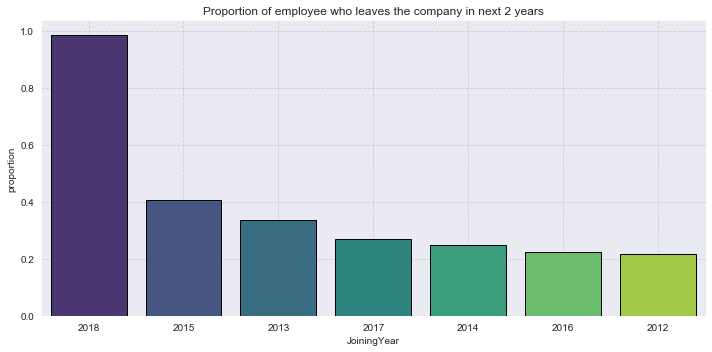

In [204]:
plt.figure(figsize=(10,5))
sns.barplot(x=prop_df['JoiningYear'],y=prop_df['proportion'],palette='viridis',edgecolor="black",order=prop_df['JoiningYear'])
plt.title("Proportion of employee who leaves the company in next 2 years")
plt.xlabel('JoiningYear')
plt.tight_layout()
plt.grid(True)
plt.show()

From the graph and dataframe we can see that proportion of employee who joined in 2018 leaves the company in next 2 years is most and in 2012 it is least.

## City

In [209]:
d1=pd.DataFrame(df.groupby(['City','LeaveOrNot'])['City'].count())
d1

City
City      LeaveOrNot      
Bangalore 0           1633
          1            595
New Delhi 0            791
          1            366
Pune      0            629
          1            639

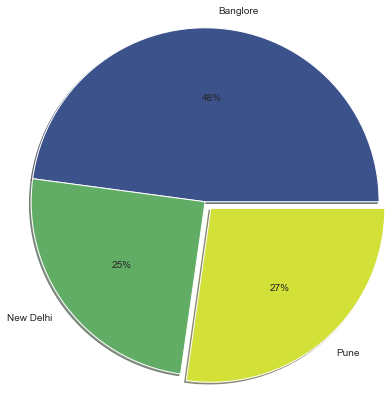

In [216]:
#to see the composition of city
out_df=pd.DataFrame(df.groupby('City')['City'].count())
colors = ['#3b528b','#61ad66','#d2e038']
plt.pie(out_df['City'],labels=['Banglore','New Delhi','Pune'],autopct='%.0f%%',colors=colors,radius=2,explode = (0,0, 0.1),shadow=True)
plt.show()

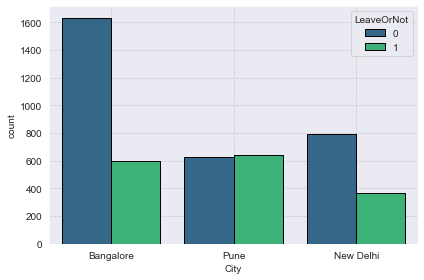

In [217]:
sns.countplot(df['City'],hue=df['LeaveOrNot'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [218]:
prop_df=[]
for val in np.sort(df['City'].unique()):
    prop=d1['City'][val][1]/(d1['City'][val][1]+d1['City'][val][0])
    prop_df.append({
        'City':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,City,proportion
2,Pune,0.503943
1,New Delhi,0.316335
0,Bangalore,0.267056


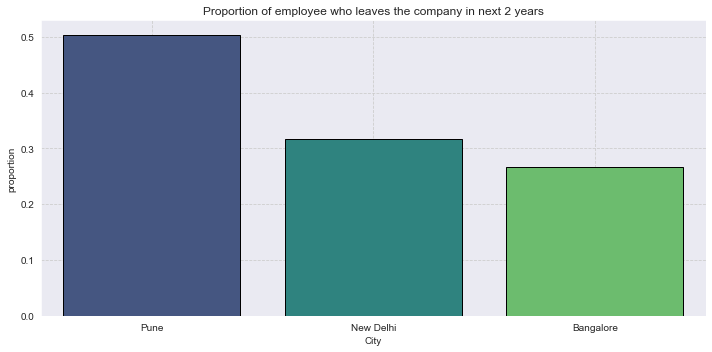

In [219]:
plt.figure(figsize=(10,5))
sns.barplot(x=prop_df['City'],y=prop_df['proportion'],palette='viridis',edgecolor="black",order=prop_df['City'])
plt.title("Proportion of employee who leaves the company in next 2 years")
plt.xlabel('City')
plt.tight_layout()
plt.grid(True)
plt.show()

Employee from Pune are most likely to leave the company in next 2 years and from Banglore the proportion is least.

## PaymentTier

In [220]:
d1=pd.DataFrame(df.groupby(['PaymentTier','LeaveOrNot'])['PaymentTier'].count())
d1

PaymentTier
PaymentTier LeaveOrNot             
1           0                   154
            1                    89
2           0                   368
            1                   550
3           0                  2531
            1                   961

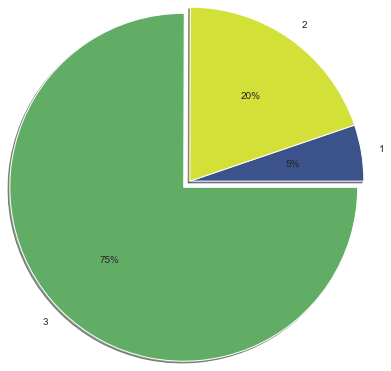

In [226]:
#to see the composition of PaymentTier
out_df=pd.DataFrame(df.groupby('PaymentTier')['PaymentTier'].count())
colors = ['#3b528b','#d2e038','#61ad66']
plt.pie(out_df['PaymentTier'],labels=['1','2','3'],autopct='%.0f%%',colors=colors,radius=2,explode = (0,0, 0.1),shadow=True)
plt.show()

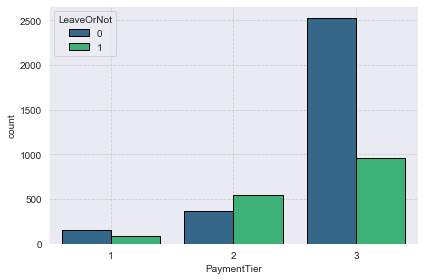

In [227]:
sns.countplot(df['PaymentTier'],hue=df['LeaveOrNot'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [228]:
prop_df=[]
for val in np.sort(df['PaymentTier'].unique()):
    prop=d1['PaymentTier'][val][1]/(d1['PaymentTier'][val][1]+d1['PaymentTier'][val][0])
    prop_df.append({
        'PaymentTier':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,PaymentTier,proportion
1,2,0.599129
0,1,0.366255
2,3,0.275200


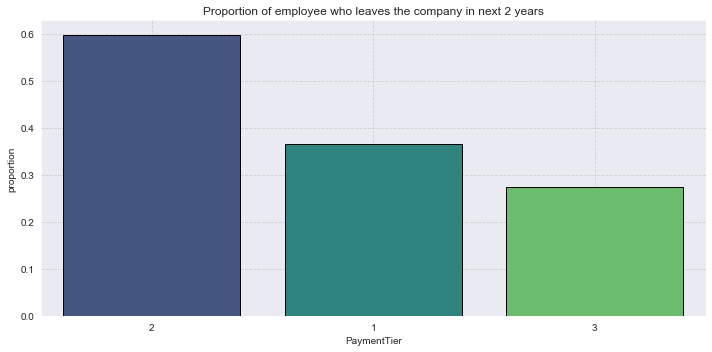

In [229]:
plt.figure(figsize=(10,5))
sns.barplot(x=prop_df['PaymentTier'],y=prop_df['proportion'],palette='viridis',edgecolor="black",order=prop_df['PaymentTier'])
plt.title("Proportion of employee who leaves the company in next 2 years")
plt.xlabel('PaymentTier')
plt.tight_layout()
plt.grid(True)
plt.show()

Employee from PaymentTier 2 are most likely to leave the company in next 2 years and from PaymentTier 3 the proportion is least.

## Age

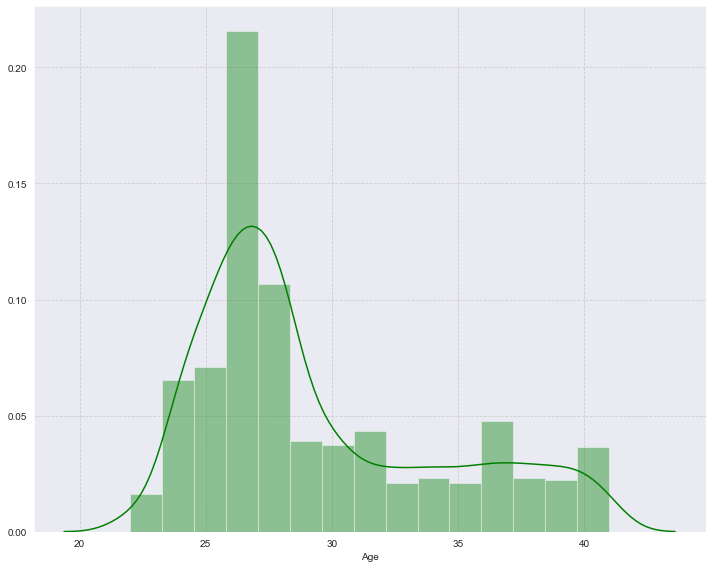

In [234]:
plt.figure(figsize=(10,8))
sns.distplot(df['Age'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.show()

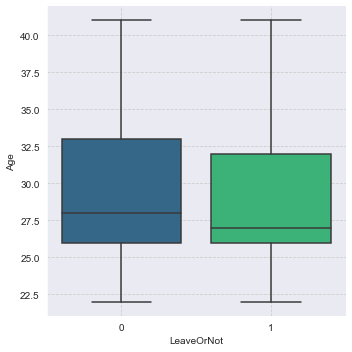

In [268]:
sns.catplot(x='LeaveOrNot',y='Age',kind='box',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()